In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV
file_path = './progress.csv'  # Update the file path as needed
data = pd.read_csv(file_path)

# Assuming your CSV columns are named 'epoch', 'validation_loss', 'precision', and 'f1_score'
validation_loss = data['cross_entropy_loss'].values
precision = 1-data['precision_score'].values
f1_score =  data['loss'].values

# Combine the metrics into a single array for processing
metrics = np.column_stack((validation_loss, precision, f1_score))
print(metrics)

# Function to identify Pareto front
def identify_pareto(metrics):
    is_pareto = np.ones(metrics.shape[0], dtype=bool)
    for i, c in enumerate(metrics):
        is_pareto[i] = np.all(np.any(metrics[:i]>c, axis=1)) and np.all(np.any(metrics[i+1:]>c, axis=1))
    return is_pareto

# Identify Pareto front
pareto_mask = identify_pareto(metrics)
pareto_front = metrics[pareto_mask]
print(pareto_front)


[[0.54901713 0.23320227 0.24287696]
 [0.27975598 0.1150761  0.13103156]
 [0.17524858 0.0870569  0.09666032]
 [0.12231512 0.04876345 0.04911534]
 [0.12705193 0.0426654  0.04339182]
 [0.14990975 0.04266604 0.04562389]
 [0.13720332 0.03648616 0.03670551]
 [0.12194099 0.02733037 0.02767629]
 [0.18309911 0.02903521 0.02921683]
 [0.2076069  0.02659091 0.02666518]
 [0.25128487 0.02651997 0.02688102]
 [0.26265672 0.02311792 0.0231875 ]]
[[0.12194099 0.02733037 0.02767629]
 [0.2076069  0.02659091 0.02666518]
 [0.25128487 0.02651997 0.02688102]
 [0.26265672 0.02311792 0.0231875 ]]


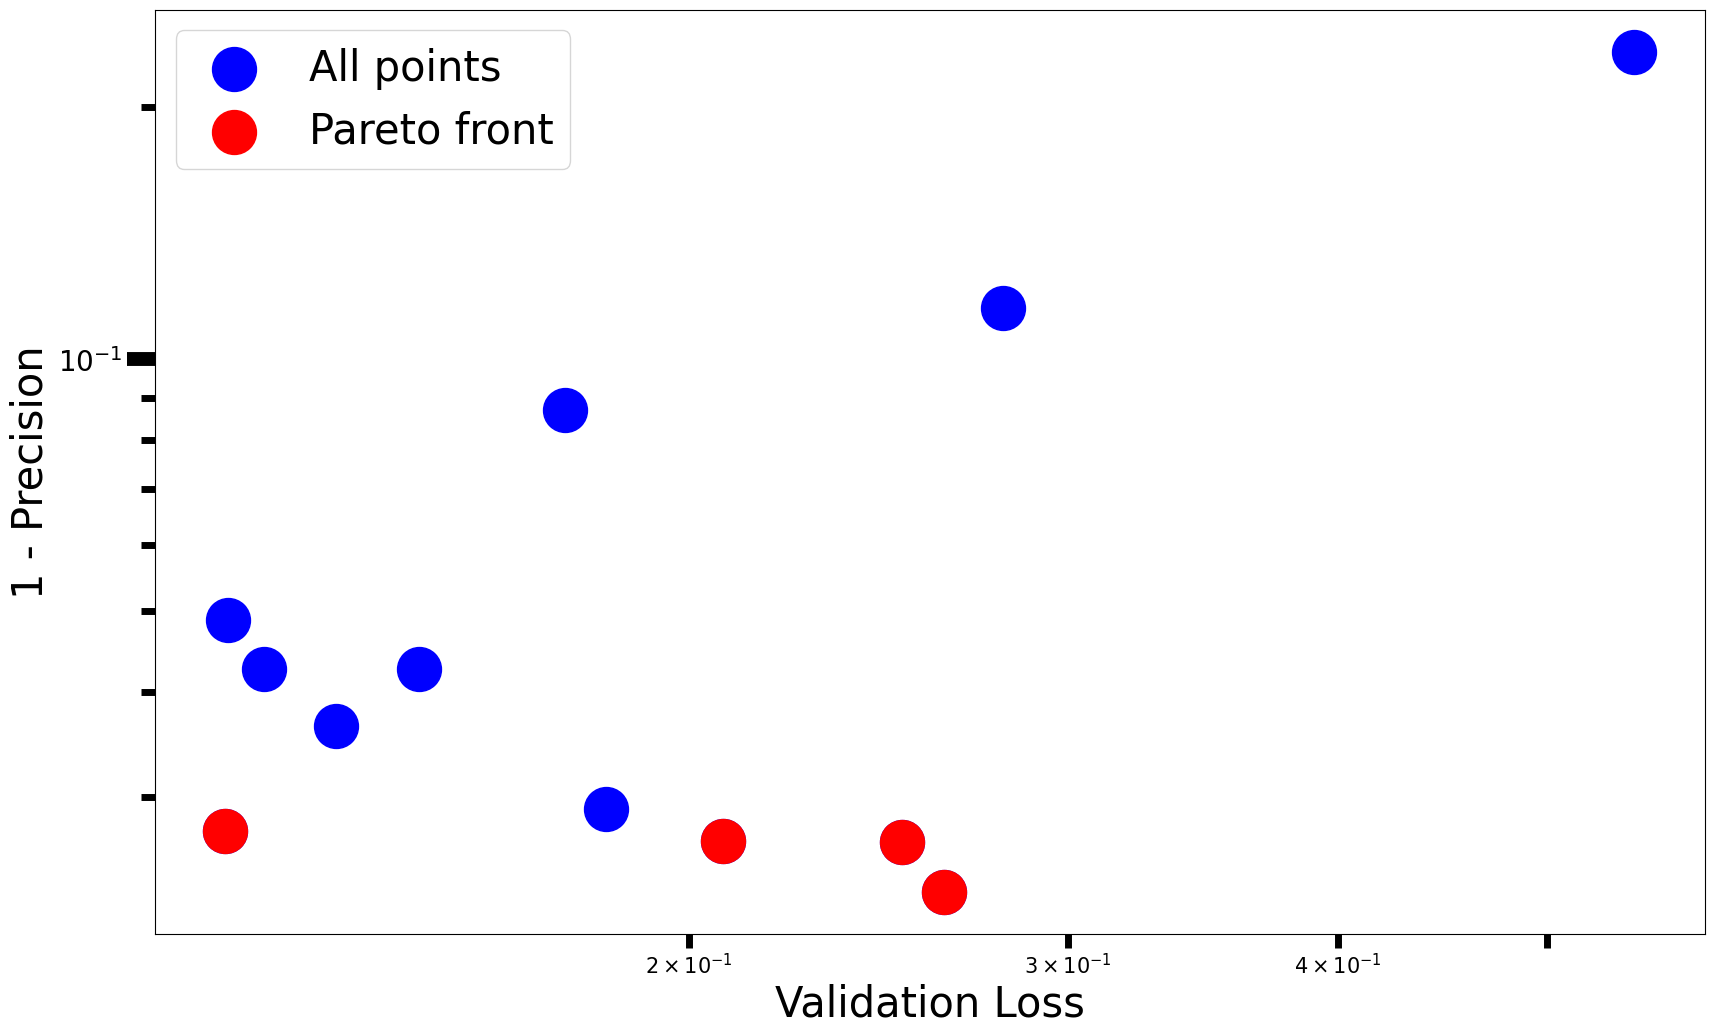

In [106]:

# Plotting Pareto front
fig,ax=plt.subplots(1,figsize=(20, 12))
ax.scatter(validation_loss, precision, c='blue', label='All points',s=1000,)
ax.scatter(pareto_front[:, 0], pareto_front[:, 1], c='red', label='Pareto front', s=1000)
ax.set_xlabel('Validation Loss')
ax.set_ylabel('1 - Precision')
ax.tick_params(length=20,width=10,axis='both', which='major', labelsize=20)
ax.tick_params(length=10,width=5,axis='both', which='minor', labelsize=15)
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xticks([])
# ax.set_yticks([])
ax.legend()
fig.savefig('pareto_front.png', dpi=300)

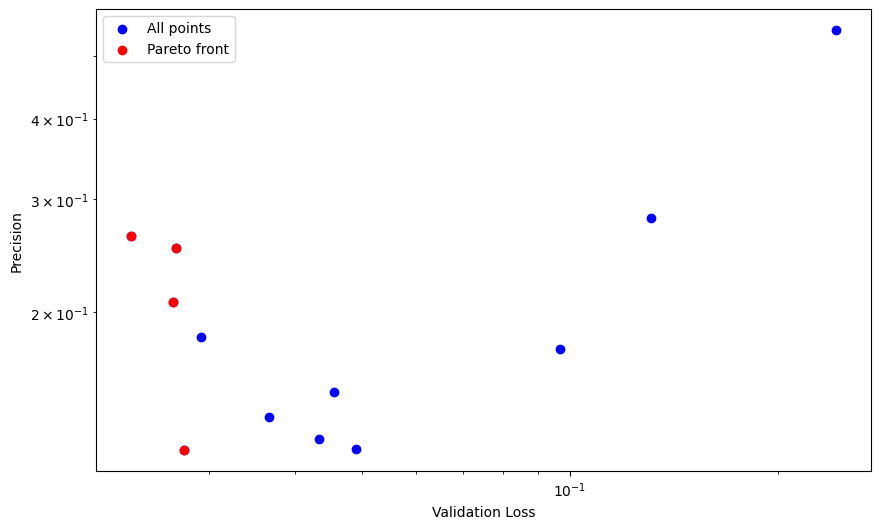

In [55]:
# Plotting Pareto front
plt.figure(figsize=(10, 6))
plt.scatter(f1_score, validation_loss, c='blue', label='All points')
plt.scatter(pareto_front[:, 2], pareto_front[:, 0], c='red', label='Pareto front')
plt.xlabel('Validation Loss')
plt.ylabel('Precision')
plt.xticks()
plt.yticks()
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()